In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from math import sqrt

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
# первые пять значений дата-сета
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
# Тип данных каждого столбца
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [6]:
# Количество нулевых значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
# Количество уникальных значений столбца Gender
df.Gender.nunique()

2

In [8]:
# Уникальные значения столбца Gender
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

Мы видим, что dataframe содержит три столбца: пол, рост и вес. Столбец Gender содержит два уникальных значения типа object: мужской или женский. Тип данных с плавающей запятой используется в столбцах Рост и Вес. Так как dataframe не содержит нулевых значений и типы данных являются ожидаемыми, нет необходимости очищать данные.

Text(0, 0.5, 'Частота')

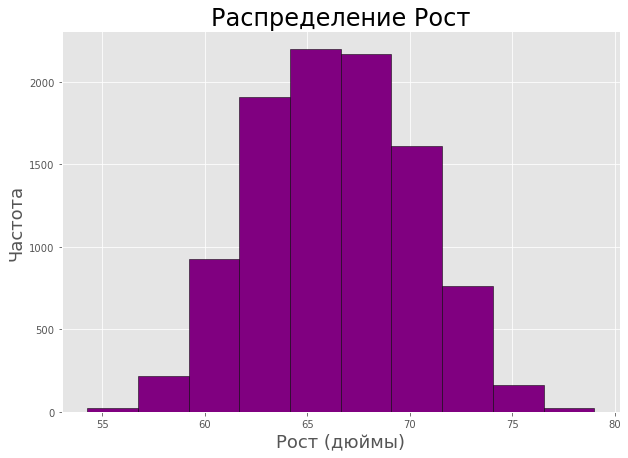

In [9]:
# Гистограмма вес
df.Height.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Распределение Рост', size=24)
plt.xlabel('Рост (дюймы)', size=18)
plt.ylabel('Частота', size=18)


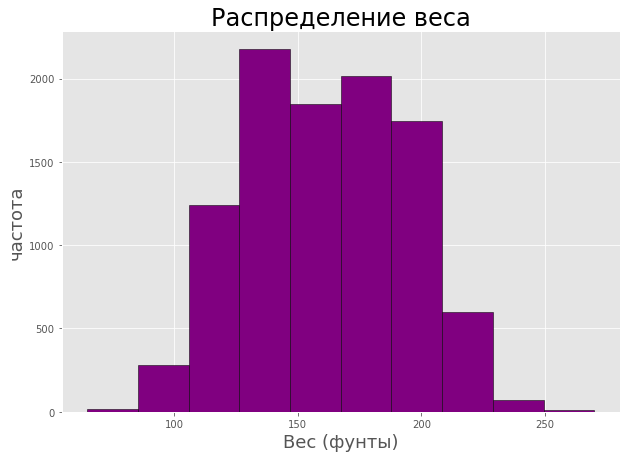

In [10]:
# Гистограмма рост
df.Weight.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Распределение веса', size=24)
plt.xlabel('Вес (фунты)', size=18)
plt.ylabel('частота', size=18);

Предыдущие графики показывают, что обе переменные Рост и Вес представляют собой нормальное распределение

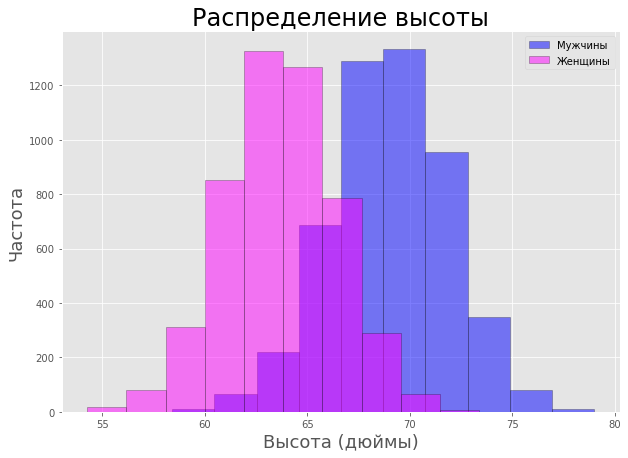

In [11]:
# Гистограмма роста
df[df['Gender']=='Male'].Height.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['Gender']=='Female'].Height.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Мужчины','Женщины'])
plt.title('Распределение высоты', size=24)
plt.xlabel('Высота (дюймы)', size=18)
plt.ylabel('Частота', size=18);

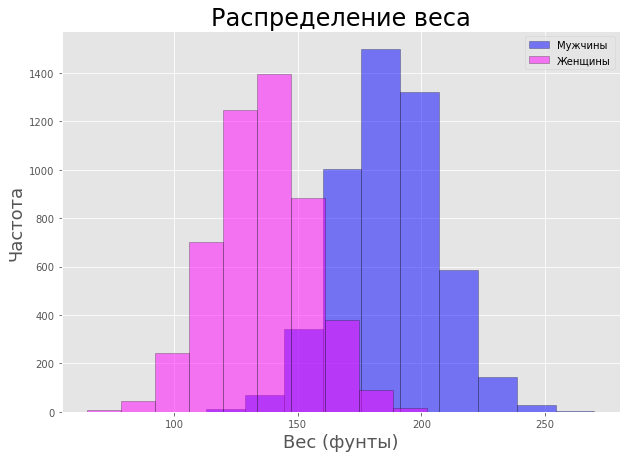

In [12]:
df[df['Gender']=='Male'].Weight.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['Gender']=='Female'].Weight.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Мужчины','Женщины'])
plt.title('Распределение веса', size=24)
plt.xlabel('Вес (фунты)', size=18)
plt.ylabel('Частота', size=18);

Предыдущие графики показывают, что рост и вес представляют собой нормальное распределениедля мужчин и женщин.

Описательную статистику набора данных:

In [13]:
# Мужчины
statistics_male = df[df['Gender']=='Male'].describe()
statistics_male.rename(columns=lambda x:x+'_male',inplace=True)

# Женщины
statistics_female = df[df['Gender']=='Female'].describe()
statistics_female.rename(columns=lambda x:x+'_female',inplace=True)

statistics = pd.concat([statistics_male,statistics_female], axis=1)
statistics

,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,63.708774,135.860093
std,2.863362,19.781155,2.696284,19.022468
min,58.406905,112.902939,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096
50%,69.027709,187.033546,63.730924,136.117583
75%,70.988744,200.357802,65.563565,148.810926
max,78.998742,269.989699,73.389586,202.237214


In [14]:
df_males = df[df['Gender']=='Male']
lr_males = LinearRegression().fit(df_males[['Height']], df_males['Weight'])

In [15]:
print('intercept:', lr_males.intercept_)

intercept: -224.4988407054588


In [16]:
print(lr_males.coef_)

[5.96177381]


Итак, уравнение регрессии имеет вид (коэффициенты округлены до сотых):
    $$Вес = -224.50 + 5.96 \cdot Рост$$

In [17]:
df_females = df[df['Gender']=='Female']
lr_females = LinearRegression().fit(df_females[['Height']], df_females['Weight'])

In [18]:
print('intercept:', lr_females.intercept_)

intercept: -246.01326574667266


In [19]:
print(lr_females.coef_)

[5.99404661]


Итак, уравнение регрессии имеет вид (коэффициенты округлены до сотых):
    $$Вес = -246.01 + 5.99 \cdot Рост$$

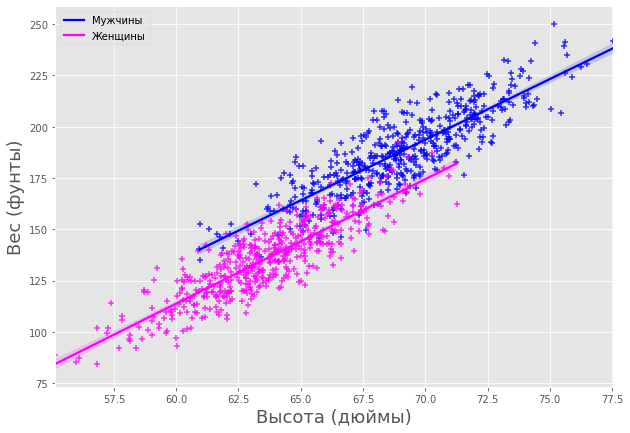

In [20]:
# Для лучшей наглядности на следующем рисунке показан график регрессии 500 случайно выбранных выборок.
df_males_sample= df[df['Gender']=='Male'].sample(500)
df_females_sample= df[df['Gender']=='Female'].sample(500)


fig = plt.figure(figsize=(10,7))
sns.regplot(x=df_males_sample.Height,y=df_males_sample.Weight,color='blue', marker='+')
sns.regplot(x=df_females_sample.Height,y=df_females_sample.Weight,color='magenta', marker='+')


plt.legend(labels=['Мужчины','Женщины'])
plt.xlabel('Высота (дюймы)', size=18)
plt.ylabel('Вес (фунты)', size=18);

In [21]:
#коэффициенты корреляции Женщин
df_females = df[df['Gender']=='Female']
df_females.corr()

,Height,Weight
Height,1.000000,0.849609
Weight,0.849609,1.000000


In [22]:
#коэффициенты корреляции Мужчин
df_males = df[df['Gender']=='Male']
df_males.corr()

,Height,Weight
Height,1.000000,0.862979
Weight,0.862979,1.000000


коэффициент корреляции больше 0,8, что означает, что рост и вес сильно коррелируют как для мужчин, так и для женщин.

In [23]:
df_dummy = pd.get_dummies(df['Gender'])
df_dummy = pd.concat([df,df_dummy], axis=1)
df_dummy

,Gender,Height,Weight,Female,Male
0,Male,73.847017,241.893563,0,1
1,Male,68.781904,162.310473,0,1
2,Male,74.110105,212.740856,0,1
3,Male,71.730978,220.042470,0,1
4,Male,69.881796,206.349801,0,1
...,...,...,...,...,...
9995,Female,66.172652,136.777454,1,0
9996,Female,67.067155,170.867906,1,0
9997,Female,63.867992,128.475319,1,0
9998,Female,69.034243,163.852461,1,0


In [24]:
df_dummy.drop('Female', axis=1,inplace=True)
df_dummy.drop('Gender', axis=1,inplace=True)
df_dummy.rename(columns={'Male':'Gender'}, inplace=True)
df_dummy.head()

,Height,Weight,Gender
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


Затем мы можем использовать этот фрейм данных для получения множественой линейной регрессии

In [25]:
mlr= LinearRegression()
mlr.fit(df_dummy[['Height','Gender']], df_dummy['Weight'])

LinearRegression()

In [26]:
print(mlr.intercept_)

-244.92350252069988


In [27]:
print(mlr.coef_)

[ 5.97694123 19.37771052]


Итак, уравнение регрессии имеет вид (коэффициенты округлены до сотых):
    $$Вес = -244.92 + 5.98 \cdot Рост + 19.38 \cdot Пол$$

Если мы хотим предсказать вес мужчины, значение пола равно 1, получая следующее уравнение:

Мужчина → Вес = -244,9235 + 5,9769 * Рост + 19,3777 * 1 = -225,5458 + 5,9769 * Рост

Для женщин пол имеет значение 0.

Женский → Вес = -244,9235 + 5,9769 * Рост + 19,3777 * 0 = -244,9235 + 5,9769 * Рост

Выдвенем гипотезу, что средний вес женщины равен среднему весу мужчины. с надежностью 0,95 примерно 1,96

  H0: M(женщин) = M(мужчин) означает, что показатель веса одинаковые у женщин и мужчин.
  
  H1: M(женщин) != M(мужчин) означает, что показатель веса у женщин не равен весу мужчин.

In [28]:
x = df_males['Weight']

In [29]:
y = df_females['Weight']

In [52]:
T = (x.mean()-y.mean()) / (sqrt((np.std(x)**2)/5000 + (np.std(y)**2)/5000))

In [53]:
T

131.83271158120462

Поскольку наблюдаемое значение критерия попало в критическую область значений параметра, то следует отвергнуть основную гипотезу в пользу альтернативной гипотезы и сказать, что средний вес женщин и мужчин отличается значимо.